# Analysis of data on stores located at airports (mainly by means of Pandas, Matplotlib, Seaborn))

The initial data was presented in an Excel spreadsheet. After some processing it acquired a form convenient for importing into the Pandas dataframe.
Importing it into a dataframe, calculati the average check in a special column:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

airports_df = pd.read_excel('airports.xlsx')
airports_df['Средний чек'] = airports_df['ТО РУБ'] / airports_df['Количество чеков']
airports_df = airports_df.reindex(columns=['Год', 'Месяц', 'Дата', 'Магазин', 'Количество чеков', 'ТО РУБ',
                          'Средний чек', 'Длина чека', 'Средняя цена SKU', 'Пассажиропоток'])
airports_df.head()

,Год,Месяц,Дата,Магазин,Количество чеков,ТО РУБ,Средний чек,Длина чека,Средняя цена SKU,Пассажиропоток
0,LY,янв,2001-01-01,ТТ3,2182,1945334.53,891.537365,2.517874,262.670069,57505
1,LY,янв,2001-01-01,ТТ4,1539,1449844.00,942.068876,2.608837,287.382359,138860
2,LY,янв,2001-01-01,ТТ5,871,727488.00,835.233065,2.970149,194.307692,821662
3,LY,янв,2001-01-01,ТТ7,703,642935.00,914.559033,2.881935,258.206827,32771
4,LY,янв,2001-01-01,ТТ9,945,935636.00,990.091005,2.522751,286.565391,20766


We have got the dataframe that includes the next columns:
- Год - Year
- Месяц - Month (янв - Jan, фев - Feb, мар - Mar, апр - Apr, май - May, июн - Jun, июл - Jul, авг - Aug, сен - Sep, окт - Oct, ноя - Nov, дек - Dec)
- Дата - Date
- Магазин - Store
- Количество чеков - Transaction Amount
- ТО РУБ - Trade Turnover, RUB
- Средний чек - Average Order Value (AOV)
- Длина чека - Unit Per Transaction (UPT)
- Средняя цена SKU - Average Item Price (AIP)
- Пассажиропоток - Passenger Traffic

## 1. Analysis of temporary changes in indicators over time

In [ ]:
color_palette = ['b', 'g', 'r', 'c', 'm', 'y', 'silver', 'midnightblue', 'orange', 'dimgrey', 'olive', 'crimson', 'lime']

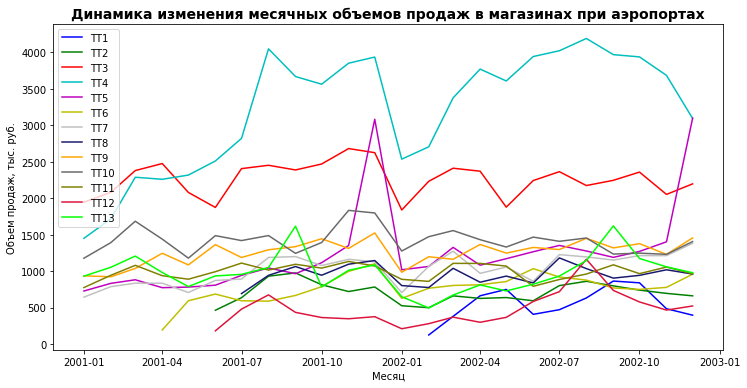

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(13):
    shop_name = 'ТТ' + str(i + 1)
    data = airports_df[airports_df['Магазин'] == shop_name]
    ax.plot(data['Дата'], data['ТО РУБ']/1000, label=shop_name, color=color_palette[i])
ax.set_title('Динамика изменения месячных объемов продаж в магазинах при аэропортах', fontsize=14, weight='bold')
ax.set_xlabel('Месяц')
ax.set_ylabel('Объем продаж, тыс. руб.')
ax.legend()
plt.show()

This chart **(Dynamics of monthly sales volumes in airport stores)** shows that:
1) sales **(Trade Turnover)** in different stores generally change in a similar way, the sales lines are mostly parallel to each other,
2) there is no specific seasonality, except for the general decline in sales in January-February of each year,
3) maximum volumes are recorded in the following stores (in descending order): No. 4, 3, 10, 9. The rest are grouped in a certain "bundle", their volumes rarely come out outside the corridor 0.5-1.2M RUB,
4) it should be noted the anomaly in sales in store No. 5: in December of each year, sales in it exceed all other stores, in other months they do not leave the general corridor,
5) it should also be pointed out that inflation, that is clearly visible on the charts of changes in AIP (see below), did not affect the total sales. So generally we can see a negative trend in sales.

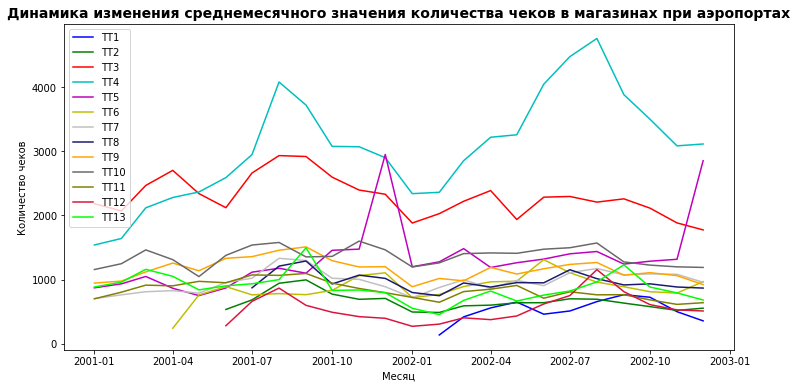

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(13):
    shop_name = 'ТТ' + str(i + 1)
    data = airports_df[airports_df['Магазин'] == shop_name]
    ax.plot(data['Дата'], data['Количество чеков'], label=shop_name, color=color_palette[i])
ax.set_title('Динамика изменения среднемесячного значения количества чеков в магазинах при аэропортах',\
             fontsize=14, weight='bold')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество чеков')
ax.legend()
plt.show()

The chart **(Dynamics of monthly TA in airport stores)** is very similar to the previous one, no additional regularities are revealed on it.

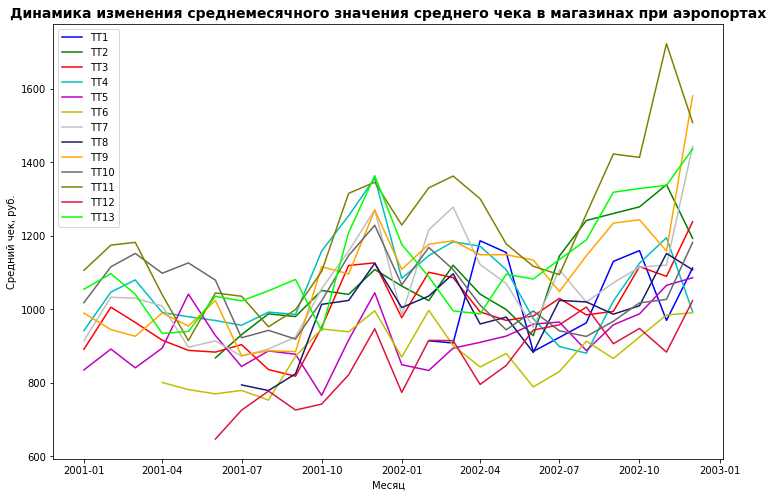

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(13):
    shop_name = 'ТТ' + str(i + 1)
    data = airports_df[airports_df['Магазин'] == shop_name]
    ax.plot(data['Дата'], data['Средний чек'], label=shop_name, color=color_palette[i])
ax.set_title('Динамика изменения среднемесячного значения среднего чека в магазинах при аэропортах', fontsize=14, weight='bold')
ax.set_xlabel('Месяц')
ax.set_ylabel('Средний чек, руб.')
ax.legend()
bplt.show()

Here, too, most of the **AOV values** are in the corridor, which gradually rises: from 800-1200 RUB at the beginning of the period - to 850-1200 RUB at the end (apparently due to inflation).

We can cleary observe the regularity of a overall AOV decline in January, a smooth drop in the summer and the last growth value for peaks in December. A small peak in March is also often recorded.

Consistently the best indicators of the AOV are observed in store No. 11 during the last year, No. 2, 9, 13 during the last half of the year.

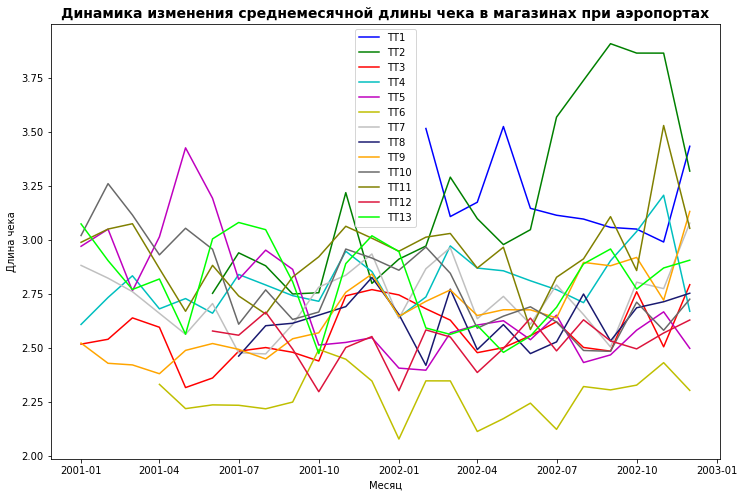

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(13):
    shop_name = 'ТТ' + str(i + 1)
    data = airports_df[airports_df['Магазин'] == shop_name]
    ax.plot(data['Дата'], data['Длина чека'], label=shop_name, color=color_palette[i])
ax.set_title('Динамика изменения среднемесячной длины чека в магазинах при аэропортах', fontsize=14, weight='bold')
ax.set_xlabel('Месяц')
ax.set_ylabel('Длина чека')
ax.legend()
plt.show()

The chart **(Dynamics of monthly Unit Per Transaction in airport stores)** clearly shows that customers in almost all stores take an average of 2.5-3 items at a time, fluctuations are mostly random.

Reduced UPT values (fluctuations is around 2.25) are constantly observed in store No. 6.

During the last year of observations, increased figures of the check value (3-3.8) have been consistently observed in the stores No. 1 and 2.

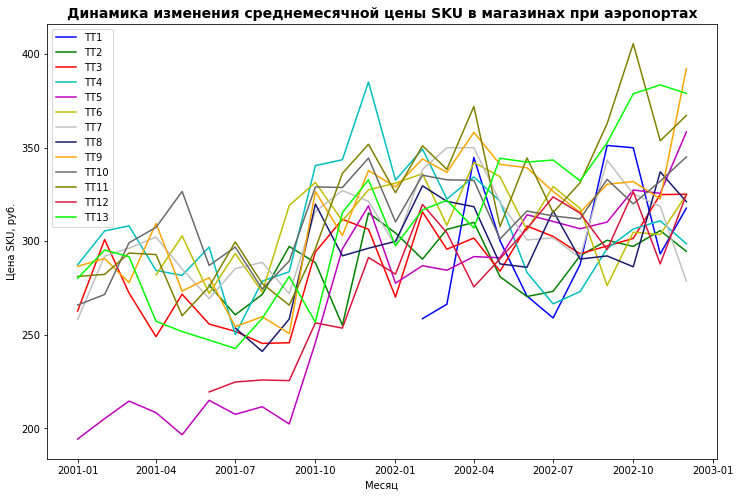

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(13):
    shop_name = 'ТТ' + str(i + 1)
    data = airports_df[airports_df['Магазин'] == shop_name]
    ax.plot(data['Дата'], data['Средняя цена SKU'], label=shop_name, color=color_palette[i])
ax.set_title('Динамика изменения среднемесячной цены SKU в магазинах при аэропортах', fontsize=14, weight='bold')
ax.set_xlabel('Месяц')
ax.set_ylabel('Цена SKU, руб.')
ax.legend()
plt.show()

The **Average Item Prices (AIP)** fluctuate in a rather narrow price range, which is gradually expanding - mainly in the range of 250-300 rubles at the beginning of the period and 270-350 rubles at the end of the period.

Here, the effect of inflation on the indicator is most pronounced, it finds expression in the general trend of price increases. The mentioned trend of expanding the "corridor" can be explained by the expansion of the assortment (this should be checked).

Among the individual stores, No. 5 with abnormally low prices at the beginning of the period, No. 11 and 13 with increased prices at the end of the period should be highlighted.

## 2. Testing the hypothesis about the impact of passenger traffic on sales

Average **passenger traffic** at airports where shops are located:

In [ ]:
round(airports_df.groupby('Магазин').agg('mean')['Пассажиропоток'], 0)

Магазин
ТТ1      24435.0
ТТ10     74913.0
ТТ11     92665.0
ТТ12     17700.0
ТТ13     64835.0
ТТ2      18146.0
ТТ3      85166.0
ТТ4     195738.0
ТТ5     938462.0
ТТ6      25229.0
ТТ7      44600.0
ТТ8      53528.0
ТТ9      28725.0
Name: Пассажиропоток, dtype: float64

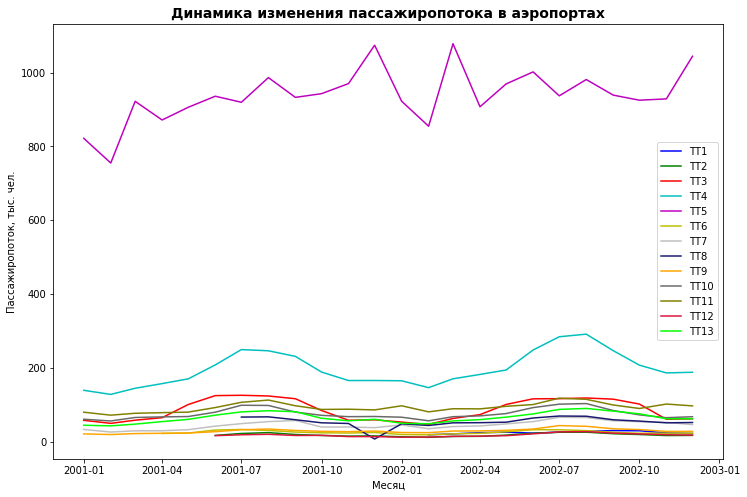

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(13):
    shop_name = 'ТТ' + str(i + 1)
    data = airports_df[airports_df['Магазин'] == shop_name]
    ax.plot(data['Дата'], data['Пассажиропоток'] / 1000, label=shop_name, color=color_palette[i])
ax.set_title('Динамика изменения пассажиропотока в аэропортах', fontsize=14, weight='bold')
ax.set_xlabel('Месяц')
ax.set_ylabel('Пассажиропоток, тыс. чел.')
ax.legend()
plt.show()

The chart shows that there is seasonality is observed in **airport passenger traffic**: maximum traffic volumes occur during the summer vacation season.

The exception to this is the busiest airport No. 5 - apparently, it is a major transit hub between different international destinations with a general dynamics of passenger traffic growth.

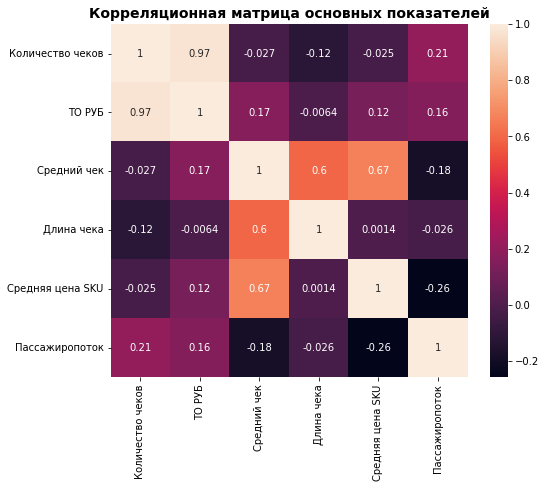

In [ ]:
corr_matrix = airports_df[['Количество чеков', 'ТО РУБ', 'Средний чек', 'Длина чека', 'Средняя цена SKU', 'Пассажиропоток']]\
.corr()
fig, ax = plt.subplots(figsize=(8, 6.5))
sns.heatmap(corr_matrix, annot=True)
ax.set_title('Корреляционная матрица основных показателей', fontsize=14, weight='bold')
plt.show()

From the **correlation matrix of the main indicators**, it can be seen that such indicators as overall trade turnover with the Transaction Amount, as well as the AOV with the UPT and the AIP, are expected to be closely related to each other (the latter 2 are not correlated with each other, which is also expected). The other pairs of indicators look independent of each other.

As for passenger traffic, it has a weak but significant positive correlation with the Transaction Amount (and thereby with Trade Turnover) and a negative correlation with the AIP (and thereby with the AOV).

* * *

To identify patterns at the level of individual stores, we calculate a number of parameters for the proportionality of Passenger Traffic ("modules") to existing sales figures and track their dynamics over time.

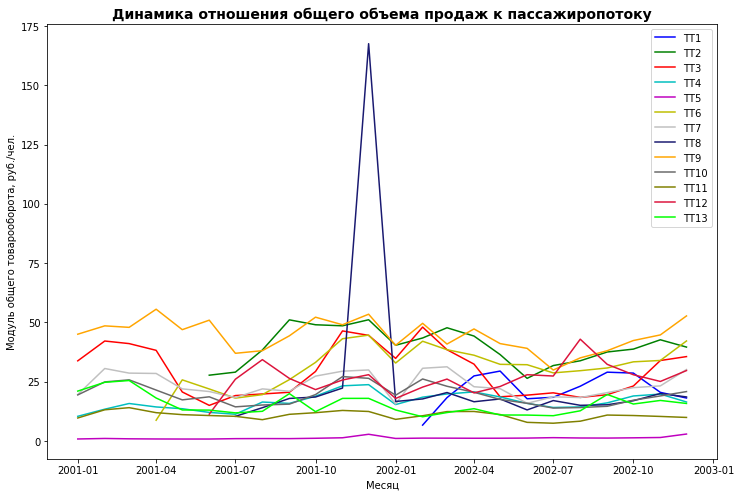

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(13):
    shop_name = 'ТТ' + str(i + 1)
    data = airports_df[airports_df['Магазин'] == shop_name]
    ax.plot(data['Дата'], data['ТО РУБ']/data['Пассажиропоток'], label=shop_name, color=color_palette[i])
ax.set_title('Динамика отношения общего объема продаж к пассажиропотоку', fontsize=14, weight='bold')
ax.set_xlabel('Месяц')
ax.set_ylabel('Модуль общего товарооборота, руб./чел.')
ax.legend()
plt.show()

According to **the ratio of Trade Turnover to Passenger Traffic**, stores can be divided into the following groups:
1) "advanced" - No. 9 and slightly lagging behind it No. 2. No. 6 has been approaching to them in the last year,
2) "seasonal leader" - No. 3, showing high performance in winter and decline during the summer holidays,
3) "middles", among whom No. 11 consistently has the worst indicators,
4) lagging store No. 5, located at the most passable airport.
The abnormal peak in Trade Turnover of store No. 8 in December of the first year of observations is clearly explained by underestimated passenger traffic data. This anomaly is pronounced on all other charts.

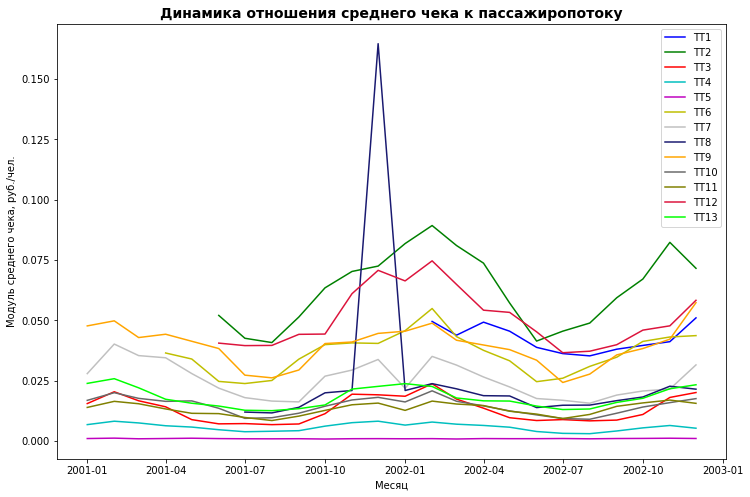

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(13):
    shop_name = 'ТТ' + str(i + 1)
    data = airports_df[airports_df['Магазин'] == shop_name]
    ax.plot(data['Дата'], data['Средний чек']/data['Пассажиропоток'], label=shop_name, color=color_palette[i])
ax.set_title('Динамика отношения среднего чека к пассажиропотоку', fontsize=14, weight='bold')
ax.set_xlabel('Месяц')
ax.set_ylabel('Модуль среднего чека, руб./чел.')
ax.legend()
plt.show()

According to **the ratio of AOV to Passenger Traffic**, there is a well-marked seasonality - a decrease during the summer holidays.

All stores are ranked well, in descending order these are: №№ 2, 5, 1, 6 and 9, 7, 8, 13, a group of 10, 11, 12, then 4, 5

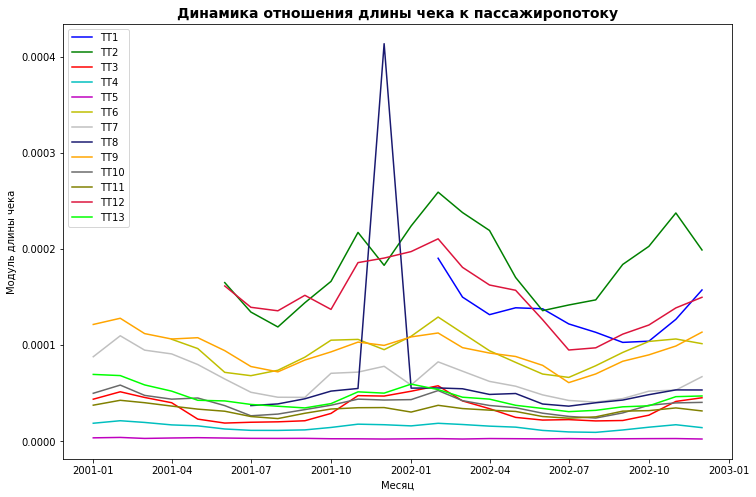

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(13):
    shop_name = 'ТТ' + str(i + 1)
    data = airports_df[airports_df['Магазин'] == shop_name]
    ax.plot(data['Дата'], data['Длина чека']/data['Пассажиропоток'], label=shop_name, color=color_palette[i])
ax.set_title('Динамика отношения длины чека к пассажиропотоку', fontsize=14, weight='bold')
ax.set_xlabel('Месяц')
ax.set_ylabel('Модуль длины чека')
ax.legend()
plt.show()

**The ratio of UPT to Passenger Traffic** practically does not differ from the above module of the average receipt.

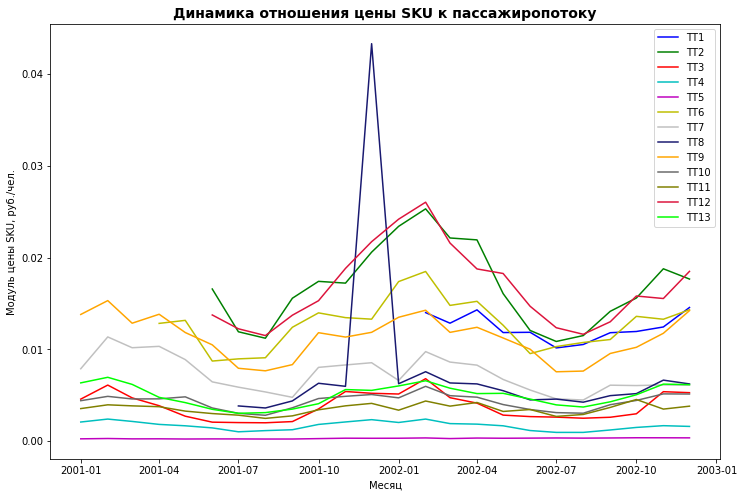

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(13):
    shop_name = 'ТТ' + str(i + 1)
    data = airports_df[airports_df['Магазин'] == shop_name]
    ax.plot(data['Дата'], data['Средняя цена SKU']/data['Пассажиропоток'], label=shop_name, color=color_palette[i])
ax.set_title('Динамика отношения цены SKU к пассажиропотоку', fontsize=14, weight='bold')
ax.set_xlabel('Месяц')
ax.set_ylabel('Модуль цены SKU, руб./чел.')
ax.legend()
plt.show()

The dynamics of **the ratio of AIP to Passenger Traffic** also almost has no difference from the previous two, except that there is no significant difference between the "advanced" stores No. 2 and 12, and, conversely, store No. 6 clearly "behaves" better than store No. 9; store No. 1 is located between them.

* * *
The store at the airport No. 5 with the largest passenger traffic is very different from the other stores, it is clearly an "obstacle" to identifying common patterns. Let's try to build a correlation matrix without it.

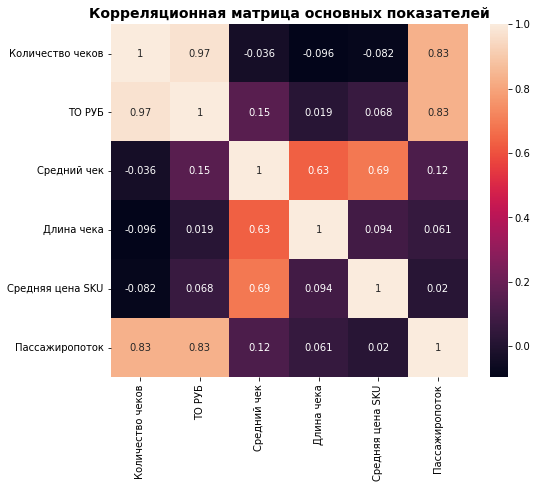

In [ ]:
corr_matrix = airports_df[airports_df['Магазин'] != 'ТТ5']\
[['Количество чеков', 'ТО РУБ', 'Средний чек', 'Длина чека', 'Средняя цена SKU', 'Пассажиропоток']]\
.corr()
fig, ax = plt.subplots(figsize=(8, 6.5))
sns.heatmap(corr_matrix, annot=True)
ax.set_title('Корреляционная матрица основных показателей', fontsize=14, weight='bold')
plt.show()

As a result of the correlation recalculation, the picture of the **influence of passenger traffic** on the number of receipts became sharper, and through it on the total turnover; we can say that the correlation has become almost linear. Conversely, the inverse correlation of passenger traffic with the average SKU price and the average receipt has become almost zero.
#### Thus, the hypothesis about the impact of airport passenger traffic on the Transaction Amount (and through it on the total Trade Turnover) in the relevant stores can be considered practically proven, and the hypothesis about its impact on other sales indicators can be refuted.

## 3. Recommendations for increasing sales in the airport stores

1\. First of all, you should pay attention to store number 5. It is located in the busiest of the airports, and at the same time the main passenger traffic passes by it. Most likely, it is located in an impassable place or for some other reason it is invisible to the target audience. Thus, a significant share of the potential market is currently being missed, and solving this problem can significantly increase overall sales and profits.

It is also necessary to find out the reason for the sharp changes in sales at this store in December of each year, with an inysignificant increase in passenger traffic during this month. Most likely, its assortment is attractive to the local population, who buy it for the New Year and Christmas.

2\. On the other hand, it is necessary to study the positive experience of stores No. 2, 3, 6, 9: they provide the best ratio of sales volume to passenger traffic.

3\. In terms of increasing the Average Order Value (AOV), the experience of store No. 11 seems to be the most useful: here this indicator embraces of both a large number of product items in the purchase (UPT) and the high cost of the items being purchased (AIP). If the area allows, it is possible to increase the assortment by introducing an additional number of more economical items into the matrix. If this and all other stores are "fully stuffed" - then, on the contrary, it is necessary to extend the experience of store No. 11 to the entire retail network.

At the same time, this store is badly loosing in terms of passenger traffic efficiency, and in this regard it looks better than only the aforementioned store No. 5.

4\. The stores No. 1 and 2 with the good UPT and store No. 13 with a good AIP, as well as the low UPT with good Trade Turnover in store No. 6 are required the additional investigation.

5\. You should also pay attention to the almost universal drop in the AOV during the summer holidays, despite the fact that passenger traffic is at its peak at this time. Apparently, this is due to the specifics of the range of stores. Here it is necessary to explore the seasonal audience of airports and offer them the appropriate seasonal products "to their taste".